In [2]:
import pandas as pd
import methods as monkey
import statistics as stat
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import numpy as np

In [3]:
exl = pd.read_csv ('weight-height.csv')
df = pd.DataFrame(exl)

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


1

In [5]:
df.drop_duplicates()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


2

In [6]:
heigh = df['Height']

for i in range(len(heigh)):
    heigh[i] *= 2.54

heigh

C:\Users\reall\AppData\Local\Temp\ipykernel_11616\2084105494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heigh[i] *= 2.54


0       187.571423
1       174.706036
2       188.239668
3       182.196685
4       177.499761
           ...    
9995    168.078536
9996    170.350573
9997    162.224700
9998    175.346978
9999    157.338385
Name: Height, Length: 10000, dtype: float64

In [7]:
weight = df['Weight']

for i in range(len(heigh)):
    weight[i] /= 2.205

weight



C:\Users\reall\AppData\Local\Temp\ipykernel_11616\4394176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] /= 2.205


0       109.702296
1        73.610192
2        96.481114
3        99.792504
4        93.582676
           ...    
9995     62.030591
9996     77.491114
9997     58.265451
9998     74.309506
9999     51.541543
Name: Weight, Length: 10000, dtype: float64

In [8]:
gender = df['Gender']
dfEdited = pd.DataFrame({'Gender':gender,'Height':heigh, 'Weight': weight})
dfEdited.head()

,Gender,Height,Weight
0,Male,187.571423,109.702296
1,Male,174.706036,73.610192
2,Male,188.239668,96.481114
3,Male,182.196685,99.792504
4,Male,177.499761,93.582676


3

In [9]:
dfMale = dfEdited[dfEdited['Gender'] == 'Male'] 
dfMale

,Gender,Height,Weight
0,Male,187.571423,109.702296
1,Male,174.706036,73.610192
2,Male,188.239668,96.481114
3,Male,182.196685,99.792504
4,Male,177.499761,93.582676
...,...,...,...
4995,Male,174.904559,80.331543
4996,Male,175.192494,72.238199
4997,Male,170.215039,90.338050
4998,Male,181.756605,84.311070


In [10]:
dfFemale = dfEdited[dfEdited['Gender'] == 'Female'] 
dfFemale

,Gender,Height,Weight
5000,Female,149.633259,46.298561
5001,Female,165.684232,64.084273
5002,Female,160.957270,59.429208
5003,Female,163.779193,58.127669
5004,Female,156.954464,58.857781
...,...,...,...
9995,Female,168.078536,62.030591
9996,Female,170.350573,77.491114
9997,Female,162.224700,58.265451
9998,Female,175.346978,74.309506


In [11]:
print(stat.mean(dfFemale['Height']))
print(stat.stdev(dfFemale['Height']))
print(min(dfFemale['Height']))
print(max(dfFemale['Height']))
print(dfFemale.quantile(1))

161.82028495269967
6.848561400043237
137.82835864574665
186.40954809981702
Height    186.409548
Weight     91.717557
Name: 1.0, dtype: float64


C:\Users\reall\AppData\Local\Temp\ipykernel_11616\2104551985.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dfFemale.quantile(1))


In [12]:
print(stat.mean(dfMale['Height']))
print(stat.stdev(dfMale['Height']))
print(min(dfMale['Height']))
print(max(dfMale['Height']))
print(dfMale.quantile(1))

175.32691860179224
7.272940060798043
148.35353852664448
200.6568055598296
Height    200.656806
Weight    122.444308
Name: 1.0, dtype: float64


C:\Users\reall\AppData\Local\Temp\ipykernel_11616\2552700668.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dfMale.quantile(1))


4

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          2.,   0.,   4.,   1.,   0.,   3.,   3.,   4.,   4.,   1.,   3.,
          4.,   4.,   7.,   5.,   5.,   5.,   7.,   9.,  10.,   9.,   4.,
         12.,  12.,   8.,  14.,  14.,  20.,  21.,  22.,  18.,  11.,  19.,
         27.,  27.,  40.,  36.,  44.,  43.,  36.,  44.,  39.,  46.,  59.,
         45.,  51.,  56.,  63.,  58.,  70.,  60.,  67.,  85.,  82.,  89.,
         84.,  93.,  79., 101.,  93., 102.,  96., 106.,  83.,  73., 106.,
        111., 105., 100.,  79., 105.,  97.,  83.,  88.,  74.,  74., 103.,
         71.,  63.,  91.,  76.,  75.,  65.,  71.,  77.,  79.,  74.,  63.,
         54.,  56.,  52.,  46.,  33.,  44.,  29.,  36.,  31.,  25.,  27.,
         31.,  25.,  26.,  25.,  17.,  19.,  22.,  10.,  14.,  12.,   7.,
          8.,   9.,   5.,   6.,   8.,   3.,   4.,   6.,   2.,   2.,   7.,
          4.,   4.,   4.,   2.,   2.,   0.,   2.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   2.,   1., 

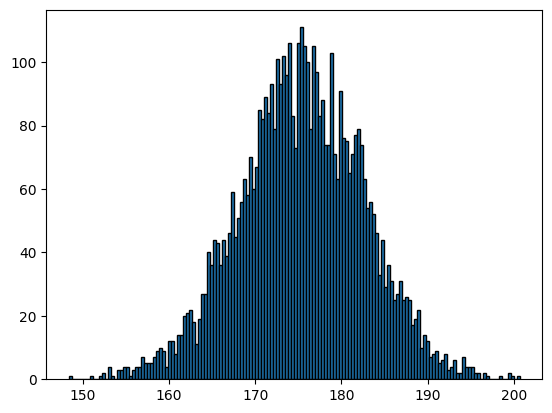

In [13]:
plt.hist(dfMale['Height'], bins=150, edgecolor='black')

(array([  1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   1.,   2.,
          0.,   2.,   0.,   1.,   3.,   1.,   1.,   2.,   2.,   2.,   7.,
          5.,   3.,   5.,  10.,  12.,   5.,   5.,   6.,  11.,  16.,  14.,
         11.,  18.,  16.,  17.,  14.,  28.,  26.,  24.,  37.,  34.,  40.,
         37.,  40.,  36.,  56.,  56.,  58.,  59.,  68.,  72.,  61.,  84.,
         65.,  77.,  82.,  96.,  94.,  97.,  97., 100.,  90.,  88., 104.,
        101.,  99., 102., 105., 113., 108., 107., 109.,  77., 102., 111.,
         95.,  96., 103.,  86.,  88.,  96.,  91.,  80.,  72.,  88.,  64.,
         78.,  69.,  66.,  54.,  65.,  48.,  52.,  43.,  37.,  33.,  30.,
         39.,  33.,  22.,  25.,  20.,  18.,  21.,  20.,  14.,   9.,  16.,
         14.,  11.,   9.,   9.,   7.,   1.,   3.,   4.,   1.,   4.,   3.,
          5.,   4.,   2.,   1.,   0.,   1.,   1.,   1.,   1.,   3.,   1.,
          1.,   1.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

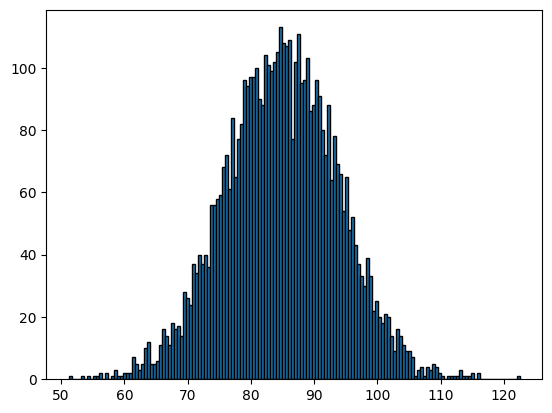

In [14]:
plt.hist(dfMale['Weight'], bins=150, edgecolor='black')

(array([  1.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,
          2.,   1.,   1.,   7.,   0.,   0.,   4.,   2.,   7.,   3.,   5.,
          7.,   7.,   5.,   6.,   5.,  11.,   8.,   9.,  14.,   6.,  17.,
         15.,  22.,  15.,  19.,  22.,  15.,  26.,  23.,  25.,  21.,  39.,
         34.,  40.,  47.,  32.,  41.,  64.,  55.,  58.,  60.,  48.,  61.,
         52.,  76.,  72.,  67.,  80.,  82.,  84.,  90.,  84.,  75.,  91.,
         96.,  81.,  99.,  92.,  78.,  98.,  80.,  86., 110., 100.,  92.,
         86.,  90.,  87.,  96.,  90.,  94.,  74.,  89.,  80.,  83.,  67.,
         60.,  78.,  58.,  66.,  62.,  80.,  71.,  56.,  50.,  60.,  45.,
         40.,  53.,  36.,  35.,  46.,  26.,  33.,  24.,  33.,  26.,  31.,
         19.,  11.,  16.,  18.,  12.,  15.,  15.,  12.,  17.,   9.,   9.,
          7.,   6.,   6.,   5.,   3.,   9.,   2.,   8.,   4.,   2.,   1.,
          1.,   1.,   1.,   1.,   0.,   0.,   0.,   2.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0., 

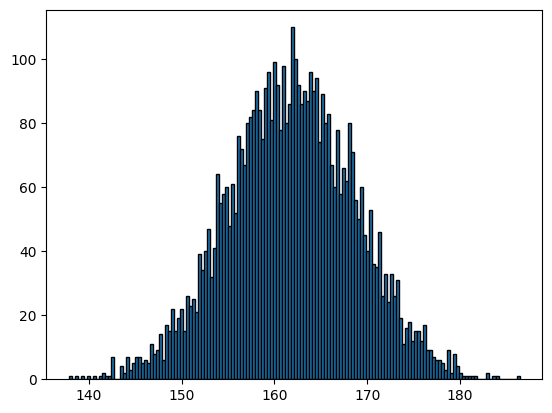

In [15]:
plt.hist(dfFemale['Height'], bins=150, edgecolor='black')

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   1.,   1.,   2.,   0.,   1.,   0.,   2.,   0.,   4.,
          2.,   3.,   4.,   1.,   5.,   5.,   7.,   9.,   6.,   8.,   8.,
         11.,  15.,  11.,  15.,  17.,  11.,  22.,  23.,  29.,  28.,  24.,
         16.,  35.,  30.,  37.,  30.,  43.,  49.,  41.,  50.,  48.,  54.,
         44.,  57.,  62.,  59.,  62.,  63.,  68.,  76.,  74.,  76.,  93.,
         75.,  88.,  80.,  84.,  94.,  81.,  95.,  92., 106.,  90.,  94.,
         85., 100., 111., 104., 101.,  82.,  93.,  91., 101.,  91.,  80.,
         90.,  81.,  62.,  70.,  78.,  62.,  81.,  63.,  74.,  56.,  47.,
         63.,  55.,  44.,  44.,  38.,  47.,  43.,  52.,  33.,  35.,  31.,
         26.,  24.,  27.,  28.,  12.,  13.,  14.,  18.,   9.,  14.,  13.,
         12.,   7.,  11.,   9.,   4.,   4.,   6.,   6.,   3.,   4.,   3.,
          2.,   2.,   2.,   3.,   1.,   0.,   0.,   4.,   1.,   2.,   1.,
          1.,   0.,   0.,   0.,   0., 

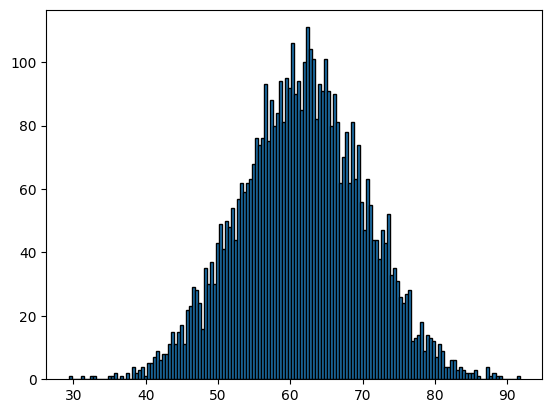

In [16]:
plt.hist(dfFemale['Weight'], bins=150, edgecolor='black')

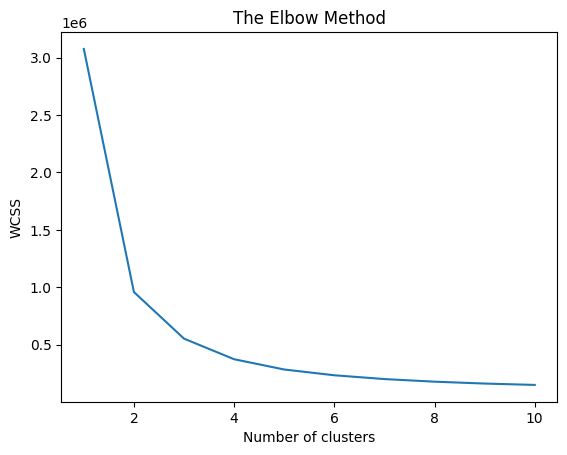

In [21]:

X = pd.DataFrame({'Height':dfEdited['Height'], 'Weight':dfEdited['Weight']})

X = np.array(X, dtype=float)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
from sklearn.metrics import rand_score
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(X)

[[187.57142322 109.70229623]
 [174.70603628  73.61019162]
 [188.2396677   96.48111363]
 ...
 [162.22470022  58.2654507 ]
 [175.34697755  74.30950628]
 [157.33838453  51.54154316]]


In [23]:
df2 = dfEdited
y_kmeans_list = list(y_kmeans)

for i in range(len(y_kmeans_list)):
    y_kmeans_list[i] += 1

tmp = list(df.iloc[:, 2].values)
k = 0
clusters = []

for i in range(len(tmp)):
    clusters.append(y_kmeans_list[k])
    k += 1

true_clusters = []
genders = list(df2['Gender'])

for i in range(len(genders)):
    if genders[i] == 'Male':
        true_clusters.append(2)
    else:
        true_clusters.append(1)

df2['Cluster'] = clusters
df2['True cluster'] = true_clusters
df2.to_excel('cluster.xlsx')
df2.head()

,Gender,Height,Weight,Cluster,True cluster
0,Male,187.571423,109.702296,2,2
1,Male,174.706036,73.610192,2,2
2,Male,188.239668,96.481114,2,2
3,Male,182.196685,99.792504,2,2
4,Male,177.499761,93.582676,2,2
